# Lesson 1: Introduction to Deep Learning with PyTorch
- [@AlfredoCanziani](https://twitter.com/alfredocanziani)
- [@GokuMohandas](https://twitter.com/GokuMohandas)

### Create the data

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import math

In [0]:
seed=12345
random.seed(seed)
# torch.manual_seed(seed)
tf.random.set_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

In [3]:
X = []
y = []

for i in range(C):
    index = 0
    r = np.linspace(0, 1, N)
    t = np.linspace(
        i * 2 * math.pi / C,
        (i + 2) * 2 * math.pi / C,
        N
    ) + np.random.normal(N) * 0.1
    
    for ix in range(N * i, N * (i + 1)):
        X.append(r[index] * np.array([math.sin(t[index]), math.cos(t[index])]))
        y.append(i)
        index += 1

X = tf.stack(X)
y = tf.stack(y)

print("SHAPES:")
print("-------------------")
print("X:", tuple(X.shape))
print("y:", tuple(y.shape))

SHAPES:
-------------------
X: (3000, 2)
y: (3000,)


In [0]:
def plot_data(X, y, d=.0, auto=False):
    """
    Plot the data.
    """
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis((-1.1, 1.1, -1.1, 1.1))
    if auto is True: plt.axis('equal')
#     plt.savefig('spiral{:.2f}.png'.format(d))

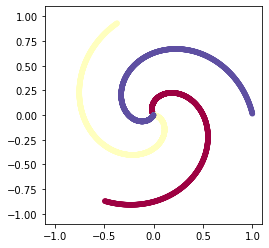

In [5]:
# Create the data
plot_data(X.numpy(), y.numpy())

In [0]:
def plot_model(X, y, model, e=.0, auto=False):
    """
    Plot the model from torch weights.
    """
    
    X = X.numpy()
    y = y.numpy(),
    w1 = model.layers[0].get_weights()[0]
    b1 = model.layers[0].get_weights()[1]
    w2 = model.layers[1].get_weights()[0]
    b2 = model.layers[1].get_weights()[1]
    
    h = 0.01

    x_min, x_max = (-1.1, 1.1)
    y_min, y_max = (-1.1, 1.1)
    
    if auto is True:
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], w1) + b1), w2) + b2
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.axis((-1.1, 1.1, -1.1, 1.1))
    plt.axis('square')
    if auto is True:
        plt.axis((xx.min(), xx.max(), yy.min(), yy.max()))
    
#     plt.savefig('train{:03.2f}.png'.format(e))

### Linear model

In [0]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [0]:
def linear_model(D_in, H, D_out):
  model = keras.Sequential([
    layers.Dense(H, activation='linear', input_shape=D_in),
    layers.Dense(D_out, activation='linear'),
  ])

  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

  model.compile(loss='mse',
                optimizer=optimizer)
  
  return model

In [77]:
model_1 = linear_model(X.shape,H,C)
model_1.fit(X, y, epochs=100)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 1.4988
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 1.2122
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 1.0111
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.8695
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7701
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7008
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6529
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6194
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5957
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5785
Epoch 11/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5657
Epoch 12/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5560
Epoch 13/100
94/94 [=================

In [78]:
model_1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 3000, 100)         300       
_________________________________________________________________
dense_39 (Dense)             (None, 3000, 3)           303       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________


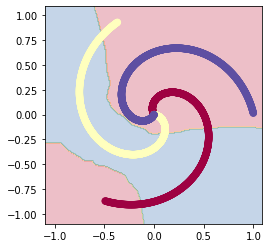

In [79]:
# Plot trained model
plot_model(X, y, model)

### Two-layered network

In [0]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [0]:
def two_layer_network(D_in, H, D_out):
  model = keras.Sequential([
    layers.Dense(H, activation='relu', input_shape=D_in),
    layers.Dense(D_out),
  ])

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model.compile(loss='binary_crossentropy',
                optimizer=optimizer)
  
  return model

In [71]:
model_2 = two_layer_network(X.shape, H, C)
model_2.fit(X,y, epochs = 100)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 1.9199
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: -0.3485
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: -2.2821
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: -2.8490
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: -3.0381
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: -3.3540
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: -3.7624
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: -3.7150
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: -2.5074
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: -2.6547
Epoch 11/100
94/94 [==============================] - 0s 1ms/step - loss: -3.2098
Epoch 12/100
94/94 [==============================] - 0s 1ms/step - loss: -3.3970
Epoch 13/100
94/94 [======

In [72]:
model_2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 3000, 100)         300       
_________________________________________________________________
dense_35 (Dense)             (None, 3000, 3)           303       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________


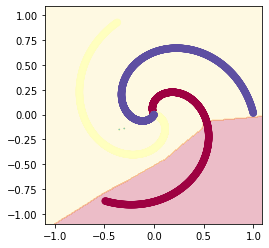

In [73]:
# Plot trained model
plot_model(X, y, model_2)

### Proper training procedure

#### Create datasets

In [0]:
split_ratio = 0.8 # train-test split
num_epochs = 100
batch_size = 64
log_every = 25

In [60]:
training = random.sample(range(X.shape[0]), int(X.shape[0] * split_ratio))
testing = [i for i in range(X.shape[0]) if not i in training]
X_train = tf.convert_to_tensor(X.numpy()[training,:])
X_test = tf.convert_to_tensor(X.numpy()[testing,:])
y_train = tf.convert_to_tensor(y.numpy()[training])
y_test = tf.convert_to_tensor(y.numpy()[testing])

X_train.shape, y_train.shape

(TensorShape([2400, 2]), TensorShape([2400]))

#### Training

In [0]:
learning_rate = 1e-3
lambda_l2 = 1e-5
dropout_p = 0.1
decay_rate = 0.9999
max_grad_norm = 5.0

In [0]:
def customized_network(D_in, H, D_out):
  model = keras.Sequential([
    layers.Dense(H, activation='relu', input_shape=D_in),
    layers.Dense(D_out,activation='softmax'),
    layers.Dropout(dropout_p),
  ])

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model.compile(loss='binary_crossentropy',
                optimizer=optimizer)
  
  return model

In [66]:
model_3 = customized_network(X_train.shape, H, C)
model_3.fit(X_train,y_train, epochs = 100)

Epoch 1/100
75/75 [==============================] - 0s 1ms/step - loss: 2.4740
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 2.5196
Epoch 3/100
75/75 [==============================] - 0s 1ms/step - loss: 2.4617
Epoch 4/100
75/75 [==============================] - 0s 1ms/step - loss: 2.4655
Epoch 5/100
75/75 [==============================] - 0s 1ms/step - loss: 2.4674
Epoch 6/100
75/75 [==============================] - 0s 1ms/step - loss: 2.4161
Epoch 7/100
75/75 [==============================] - 0s 1ms/step - loss: 2.3743
Epoch 8/100
75/75 [==============================] - 0s 1ms/step - loss: 2.4236
Epoch 9/100
75/75 [==============================] - 0s 1ms/step - loss: 2.3593
Epoch 10/100
75/75 [==============================] - 0s 1ms/step - loss: 2.4128
Epoch 11/100
75/75 [==============================] - 0s 1ms/step - loss: 2.5110
Epoch 12/100
75/75 [==============================] - 0s 1ms/step - loss: 2.4938
Epoch 13/100
75/75 [=================

In [67]:
model_3.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 2400, 100)         300       
_________________________________________________________________
dense_33 (Dense)             (None, 2400, 3)           303       
_________________________________________________________________
dropout (Dropout)            (None, 2400, 3)           0         
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________


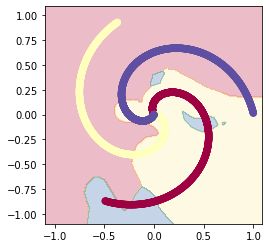

In [68]:
# Plot trained model
plot_model(X, y, model_3)

### End